# Analysis of WSBO CAI list

In [17]:
import folium, mapclassify, matplotlib, os, pygris
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [18]:
cai = gpd.read_file('data/cai.csv')

In [19]:
cai = gpd.GeoDataFrame(cai, geometry=gpd.points_from_xy(cai.Longitude, cai.Latitude), crs="EPSG:4326")

In [20]:
cai

,CAI Type,Entity name,Entity number,CMS number,FRN,Location ID,Street address,City,State or territory,Zip code,Longitude,Latitude,Explanation,Broadband Need,Broadband Availability,geometry
0,C,Seattle Business Assistance Center,,,,,1437 SOUTH JACKSON,Seattle,WA,98144,-117.4181455,48.74181752,Job training centers are integral to upskillin...,1000,100,POINT (-117.41815 48.74182)
1,C,Brewster-Bridgeport-Pateros Senior Center,,,,,109 S Bridge St,Brewster,WA,98812,-119.781,48.09881,Through Community Action Plans submitted by Wa...,1000,90,POINT (-119.78100 48.09881)
2,C,Columbia County Senior Center,,,,,403 E Patit St,Dayton,WA,99328,-117.979966,46.323479,Through Community Action Plans submitted by Wa...,1000,100,POINT (-117.97997 46.32348)
3,C,Davenport Senior Center,,,,,728 Morgan St,Davenport,WA,99122,-118.151988,47.65426,Through Community Action Plans submitted by Wa...,1000,40,POINT (-118.15199 47.65426)
4,C,Grand Coulee Senior Center,,,,,203 Main St,Grand Coulee,WA,99133,-124.6237547,48.36803784,Through Community Action Plans submitted by Wa...,1000,10,POINT (-124.62375 48.36804)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,S,Winlock School District 232,145335,,9297896,,311 Nw Fir St,Winlock,WA,98596,-122.9400853,46.493284,,1000,25,POINT (-122.94009 46.49328)
477,S,Winolequa Learning Academy,,,,,405 NW Benton,WINLOCK,WA,98596,-122.940541,46.49258989,,1000,25,POINT (-122.94054 46.49259)
478,S,Wishram High & Elementary School,116394,,11989746,,135 Bunn Street,Wishram,WA,98673,-120.9626266,45.66041198,,1000,10,POINT (-120.96263 45.66041)
479,S,Wishram School District 94,145374,,11989746,,135 Bunn,Wishram,WA,98673,-120.9626266,45.66041198,,1000,10,POINT (-120.96263 45.66041)


In [21]:
cai = cai.to_crs(epsg=3857)

In [22]:
import xyzservices
xyzservices.providers.CartoDB

{'Positron': {'url': 'https://{s}.basemaps.cartocdn.com/{variant}/{z}/{x}/{y}{r}.png',
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>',
  'attribution': '(C) OpenStreetMap contributors (C) CARTO',
  'subdomains': 'abcd',
  'max_zoom': 20,
  'variant': 'light_all',
  'name': 'CartoDB.Positron'},
 'PositronNoLabels': {'url': 'https://{s}.basemaps.cartocdn.com/{variant}/{z}/{x}/{y}{r}.png',
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>',
  'attribution': '(C) OpenStreetMap contributors (C) CARTO',
  'subdomains': 'abcd',
  'max_zoom': 20,
  'variant': 'light_nolabels',
  'name': 'CartoDB.PositronNoLabels'},
 'PositronOnlyLabels': {'url': 'https://{s}.basemaps.cartocdn.com/{variant}/{z}/{x}/{y}{r}.png',
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>',
  'attribution': '(C) OpenStreetMap contributors (C) CARTO',
  'subdomains': 'abcd',
  'max_zoom': 20,
  'variant': 'light_only_labels',
  'name': 'CartoDB.PositronOnlyLabels'},
 'DarkMatter': {'url': 'https://{s}.basemaps.cartocdn.com/{variant}/{z}/{x}/{y}{r}.png',
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>',
  'attribution': '(C) OpenStreetMap contributors (C) CARTO',
  'subdomains': 'abcd',
  'max_zoom': 20,
  'variant': 'dark_all',
  'name': 'CartoDB.DarkMatter'},
 'DarkMatterNoLabels': {'url': 'https://{s}.basemaps.cartocdn.com/{variant}/{z}/{x}/{y}{r}.png',
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>',
  'attribution': '(C) OpenStreetMap contributors (C) CARTO',
  'subdomains': 'abcd',
  'max_zoom': 20,
  'variant': 'dark_nolabels',
  'name': 'CartoDB.DarkMatterNoLabels'},
 'DarkMatterOnlyLabels': {'url': 'https://{s}.basemaps.cartocdn.com/{variant}/{z}/{x}/{y}{r}.png',
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>',
  'attribution': '(C) OpenStreetMap contributors (C) CARTO',
  'subdomains': 'abcd',
  'max_zoom': 20,
  'variant': 'dark_only_labels',
  'name': 'CartoDB.DarkMatterOnlyLabels'},
 'Voyager': {'url': 'https://{s}.basemaps.cartocdn.com/{variant}/{z}/{x}/{y}{r}.png',
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>',
  'attribution': '(C) OpenStreetMap contributors (C) CARTO',
  'subdomains': 'abcd',
  'max_zoom': 20,
  'variant': 'rastertiles/voyager',
  'name': 'CartoDB.Voyager'},
 'VoyagerNoLabels': {'url': 'https://{s}.basemaps.cartocdn.com/{variant}/{z}/{x}/{y}{r}.png',
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>',
  'attribution': '(C) OpenStreetMap contributors (C) CARTO',
  'subdomains': 'abcd',
  'max_zoom': 20,
  'variant': 'rastertiles/voyager_nolabels',
  'name': 'CartoDB.VoyagerNoLabels'},
 'VoyagerOnlyLabels': {'url': 'https://{s}.basemaps.cartocdn.com/{variant}/{z}/{x}/{y}{r}.png',
  'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>',
  'attribution': '(C) OpenStreetMap contributors (C) CARTO',
  'subdomains': 'abcd',
  'max_zoom': 20,
  'variant': 'rastertiles/voyager_only_labels',
  'name': 'CartoDB.VoyagerOnlyLabels'},
 'VoyagerLabelsUnder': {'url': 'https://{s}.basema

In [23]:
cai.explore(tiles='CartoDB.Positron')

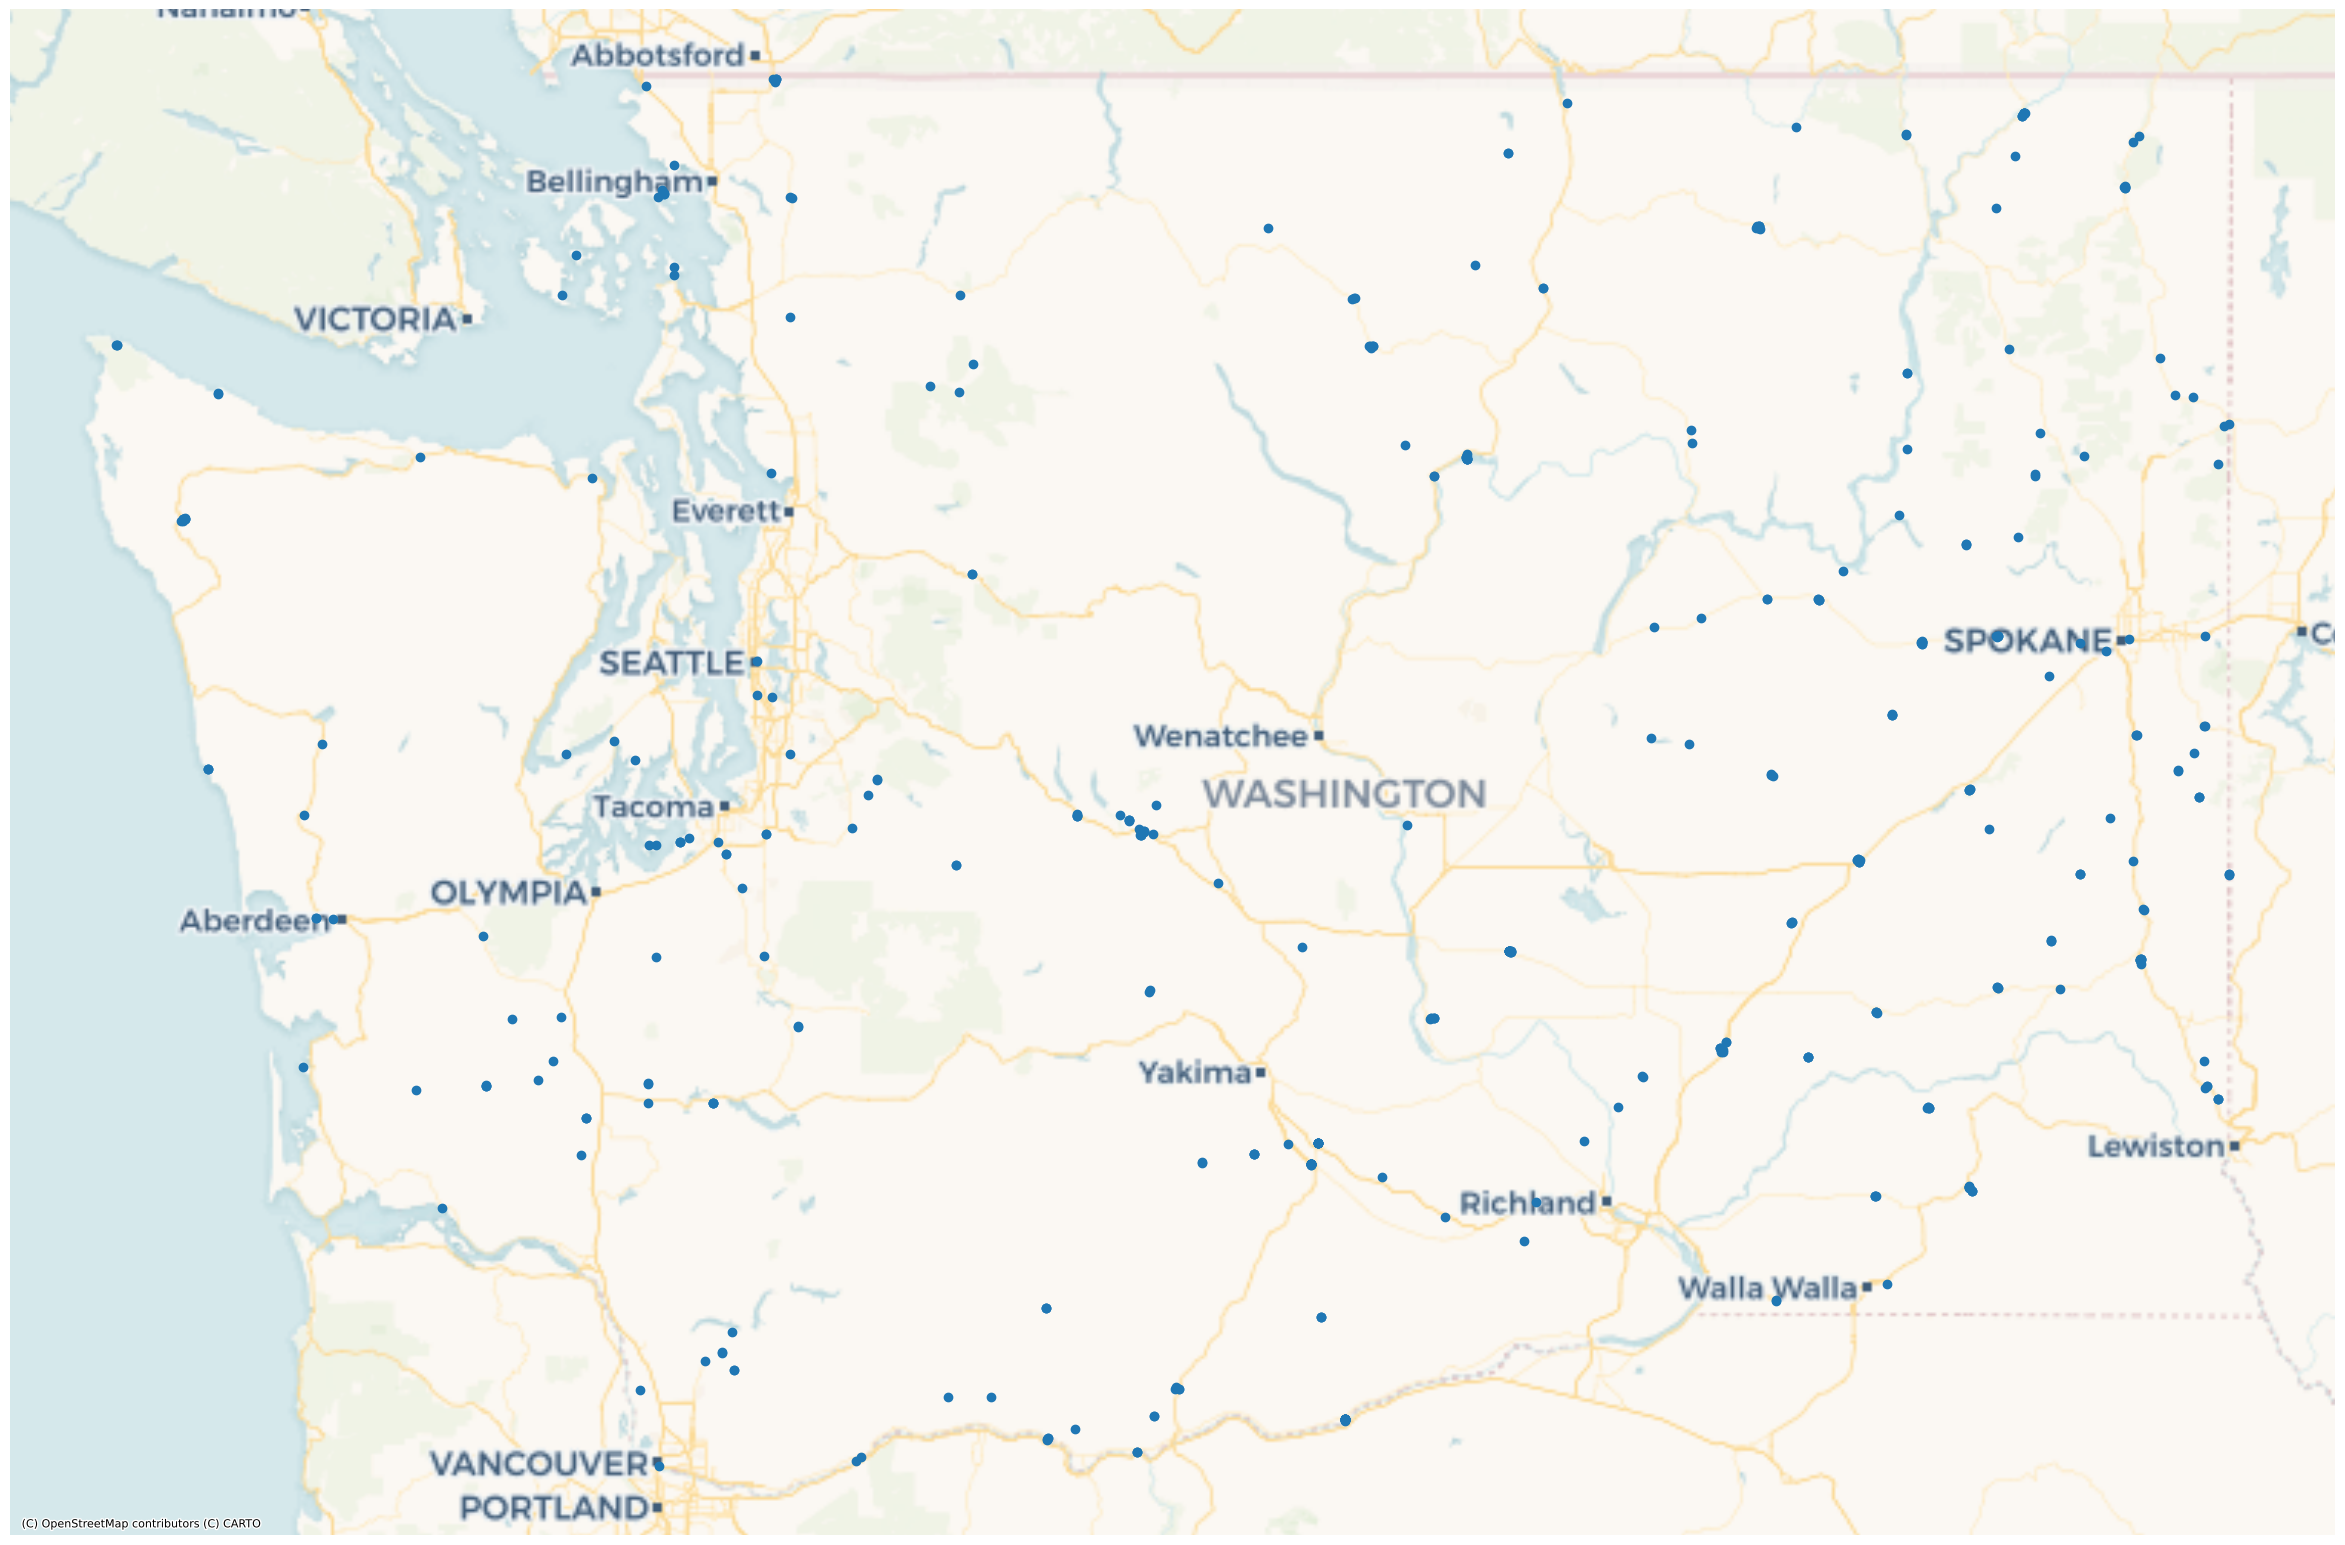

In [8]:
fig, ax2 = plt.subplots(figsize=(30, 25))
cai.plot(ax=ax2)
ctx.add_basemap(ax=ax2, crs='epsg:3857', source=ctx.providers.CartoDB.Voyager)
ax2.axis('off')
plt.savefig(os.path.join('export', 'caiMap.png'), format='png', bbox_inches='tight', pad_inches=0)

In [25]:
cai.to_parquet(os.path.join('export', 'cai.parquet'))

In [9]:
waCounties = pygris.counties(state='WA', cache=True)

Using the default year of 2021
Using FIPS code '53' for input 'WA'


In [10]:
waCounties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680976231,61568965,+46.2946377,-123.4244583,"POLYGON ((-123.49077 46.38358, -123.48813 46.3..."
173,53,041,01531927,53041,Lewis,Lewis County,06,H1,G4020,500,16500,None,A,6223175362,86929744,+46.5800714,-122.3774443,"POLYGON ((-122.93223 46.38741, -122.93257 46.3..."
876,53,031,01531936,53031,Jefferson,Jefferson County,06,H1,G4020,None,None,None,A,4671633827,994992501,+47.8057075,-123.5270572,"POLYGON ((-122.70412 47.80378, -122.70573 47.8..."
1161,53,013,01513273,53013,Columbia,Columbia County,06,H1,G4020,None,None,None,A,2249624779,12561759,+46.2928505,-117.9116345,"POLYGON ((-117.73737 46.44933, -117.73742 46.4..."
1201,53,037,01531926,53037,Kittitas,Kittitas County,06,H1,G4020,None,21260,None,A,5949926850,92486168,+47.1244411,-120.6767092,"POLYGON ((-120.00214 46.99732, -120.00193 46.9..."


In [11]:
waCounties = gpd.GeoDataFrame(waCounties, geometry='geometry')
waCounties.to_crs(epsg=3857)
waCounties = waCounties.reset_index(drop=True)
waCounties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680976231,61568965,+46.2946377,-123.4244583,"POLYGON ((-123.49077 46.38358, -123.48813 46.3..."
1,53,041,01531927,53041,Lewis,Lewis County,06,H1,G4020,500,16500,None,A,6223175362,86929744,+46.5800714,-122.3774443,"POLYGON ((-122.93223 46.38741, -122.93257 46.3..."
2,53,031,01531936,53031,Jefferson,Jefferson County,06,H1,G4020,None,None,None,A,4671633827,994992501,+47.8057075,-123.5270572,"POLYGON ((-122.70412 47.80378, -122.70573 47.8..."
3,53,013,01513273,53013,Columbia,Columbia County,06,H1,G4020,None,None,None,A,2249624779,12561759,+46.2928505,-117.9116345,"POLYGON ((-117.73737 46.44933, -117.73742 46.4..."
4,53,037,01531926,53037,Kittitas,Kittitas County,06,H1,G4020,None,21260,None,A,5949926850,92486168,+47.1244411,-120.6767092,"POLYGON ((-120.00214 46.99732, -120.00193 46.9..."


<Axes: >

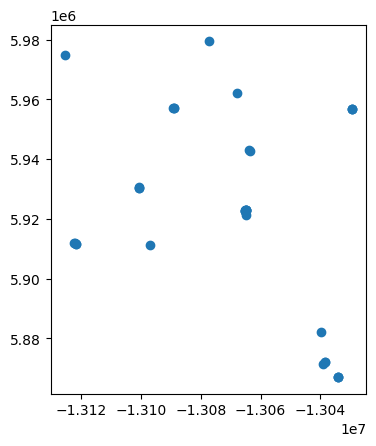

In [12]:
cai.clip(waCounties[waCounties.NAME == 'Whitman'].to_crs('EPSG:3857')).plot()

(-13170196.510233125, -13022032.227210317, 5840525.12248073, 5991591.162917712)

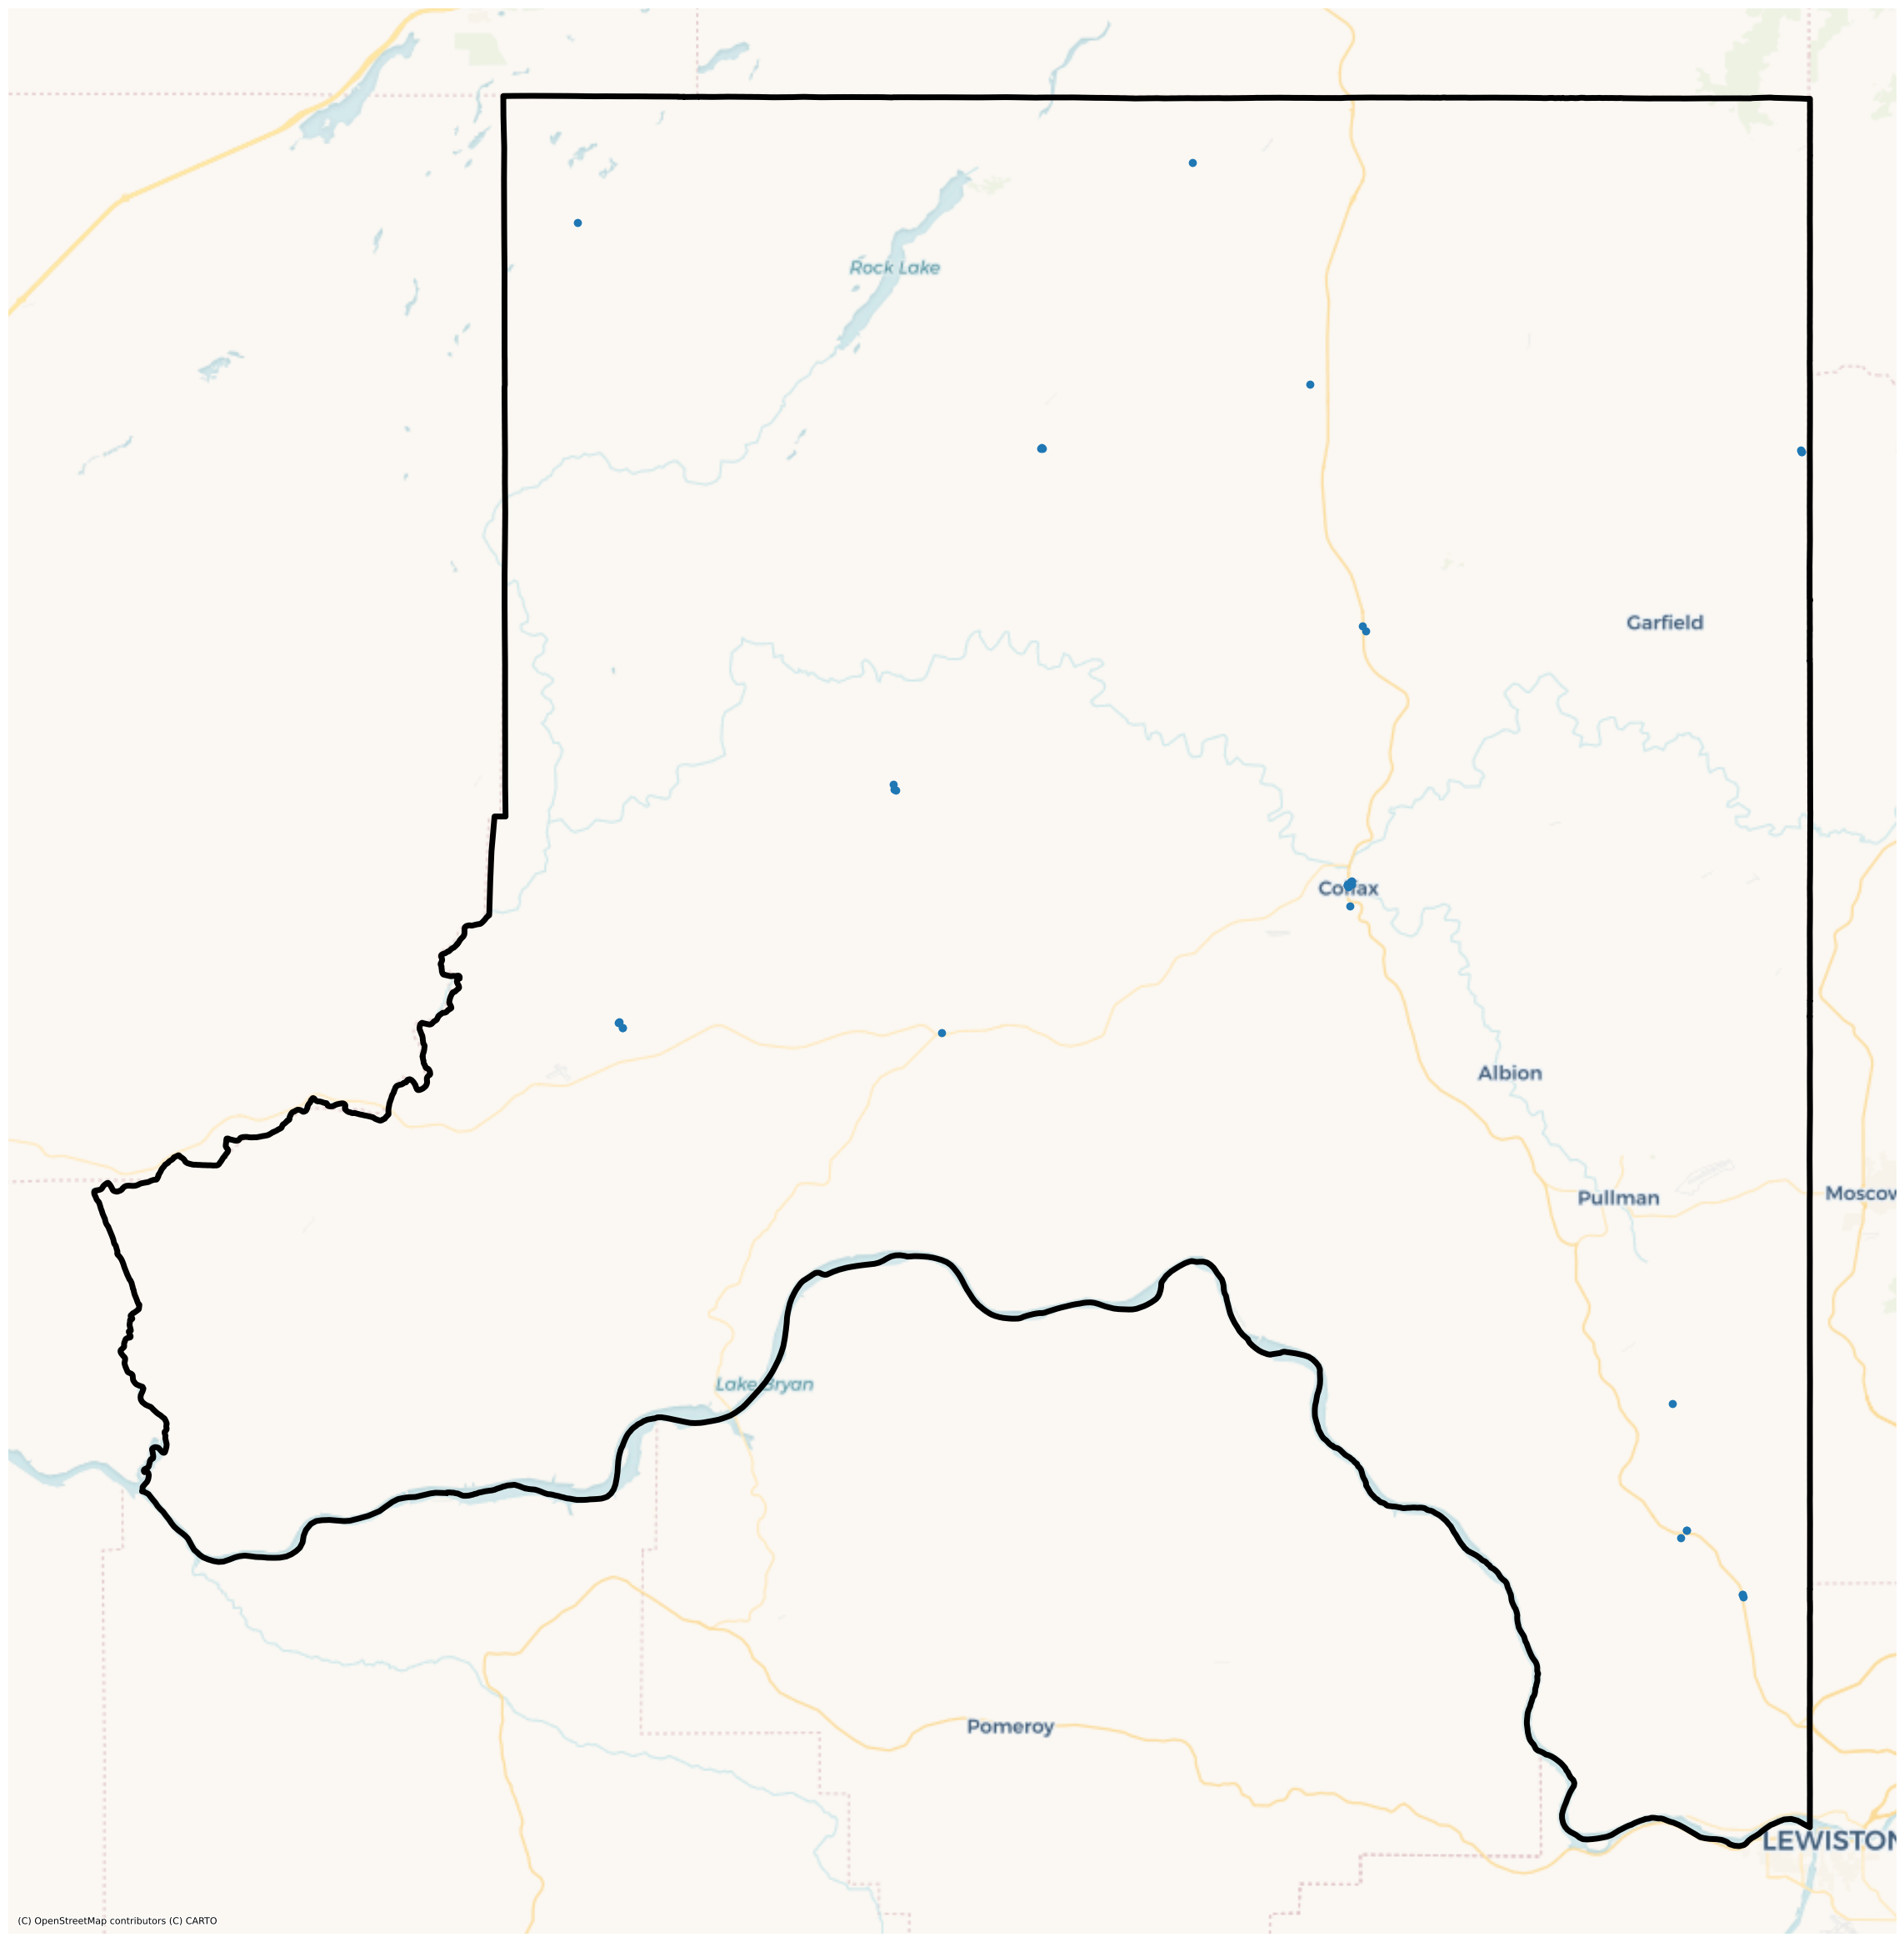

In [13]:
fig, ax2 = plt.subplots(figsize = (30,30))
waCounties[waCounties.NAME == 'Whitman'].to_crs(epsg=3857).plot(ax=ax2, facecolor='none', edgecolor='black', lw=5)
# cai.plot(ax=ax2)
clipCai = cai.clip(waCounties[waCounties.NAME == 'Whitman'].to_crs(epsg=3857))
clipCai.plot(ax=ax2)
ctx.add_basemap(ax=ax2, crs='EPSG:3857', source=ctx.providers.CartoDB.Voyager)
ax2.axis('off')

In [14]:
ctx.providers.Esri.WorldGrayCanvas

{'url': 'https://server.arcgisonline.com/ArcGIS/rest/services/{variant}/MapServer/tile/{z}/{y}/{x}',
 'variant': 'Canvas/World_Light_Gray_Base',
 'html_attribution': 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ',
 'attribution': 'Tiles (C) Esri -- Esri, DeLorme, NAVTEQ',
 'max_zoom': 16,
 'name': 'Esri.WorldGrayCanvas'}

In [15]:
for county in waCounties.NAME:
    print(county)
    fig, ax2 = plt.subplots(figsize=(30, 30))
    waCounties[waCounties.NAME == county].to_crs('EPSG:3857').plot(ax=ax2, facecolor='none', edgecolor='black', lw=5)
    clipCai = cai.clip(waCounties[waCounties.NAME == county].to_crs(epsg=3857))
    clipCai.plot(ax=ax2, marker='.', markersize=500)
    ctx.add_basemap(ax=ax2, crs='epsg:3857', source=ctx.providers.CartoDB.Voyager)
    ax2.axis('off')
    plt.savefig(os.path.join('export', 'caiMaps', f'{county}.png'), format='png', bbox_inches='tight', pad_inches=0)
    plt.close()

Wahkiakum
Lewis
Jefferson
Columbia
Kittitas
Snohomish
Yakima
Okanogan
Spokane
Island


C:\Users\nick.pappin\AppData\Local\Temp\ipykernel_1312\3112294577.py:6: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  clipCai.plot(ax=ax2, marker='.', markersize=500)


Clallam
Stevens
Pend Oreille
Whatcom
Chelan


C:\Users\nick.pappin\AppData\Local\Temp\ipykernel_1312\3112294577.py:6: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  clipCai.plot(ax=ax2, marker='.', markersize=500)


Asotin


C:\Users\nick.pappin\AppData\Local\Temp\ipykernel_1312\3112294577.py:6: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  clipCai.plot(ax=ax2, marker='.', markersize=500)


Ferry
Douglas


C:\Users\nick.pappin\AppData\Local\Temp\ipykernel_1312\3112294577.py:6: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  clipCai.plot(ax=ax2, marker='.', markersize=500)


Benton
Garfield


C:\Users\nick.pappin\AppData\Local\Temp\ipykernel_1312\3112294577.py:6: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  clipCai.plot(ax=ax2, marker='.', markersize=500)


King
Pacific
Klickitat
San Juan
Grays Harbor
Cowlitz


C:\Users\nick.pappin\AppData\Local\Temp\ipykernel_1312\3112294577.py:6: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  clipCai.plot(ax=ax2, marker='.', markersize=500)


Walla Walla
Grant
Adams
Clark
Lincoln
Kitsap


C:\Users\nick.pappin\AppData\Local\Temp\ipykernel_1312\3112294577.py:6: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  clipCai.plot(ax=ax2, marker='.', markersize=500)


Whitman
Mason
Skagit
Pierce
Thurston
Franklin
Skamania
